# Apresentação

    O SVM (support vector machine) foi um modelo para
    classificação que fez muito sucesso na década de
    90 pelo seu baixo custo computacional. Um modelo
    tão interessante que até hoje ainda é estudado.

# Preparando os dados:

    Vamos começar escolhendo um dataset adequado para o estudo. Em
    tese, o SVM só funciona em casos de classificação onde é possivel
    separar linearmente os dados a se classificar.

    E de fato só funciona assim mesmo... O que acontece quando os
    dados não são linearmente separáveis inicialmente é que ele
    faz um "truque de Kernel", ou seja, transforma os dados, levando
    até uma dimensão que se possa separar linearmente os dados.

    A SVM é frequentemente usada em problemas de classificação com
    múltiplas, então vamos escolher um dataframe que proporcione
    essa capacidade.

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import tensorflow_datasets as tfds
from sklearn import datasets
from matplotlib import pyplot as plt

In [34]:
for dataset in dir(datasets):
  if 'load' in dataset:
    print(dataset)

__loader__
load_breast_cancer
load_diabetes
load_digits
load_files
load_iris
load_linnerud
load_sample_image
load_sample_images
load_svmlight_file
load_svmlight_files
load_wine


In [35]:
dt = datasets.load_iris();dt.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [36]:
dt.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [61]:
data,target = datasets.load_iris(return_X_y=True, as_frame=True)
df = pd.concat([data,target],axis=1);df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [47]:
# Criando uma nova coluna:
class_mapping = np.array(dt.target_names)
df['target_names'] = class_mapping[df['target'].values]

# VSM

In [40]:
from sklearn.model_selection import train_test_split as tts

In [75]:
X = data.loc[target.isin([0,1]),['petal length (cm)','petal width (cm)']]
y = target[target.isin([0,1])]

In [78]:
X_train, X_test, y_train, y_test = tts(X,y,test_size=.3, random_state=42)

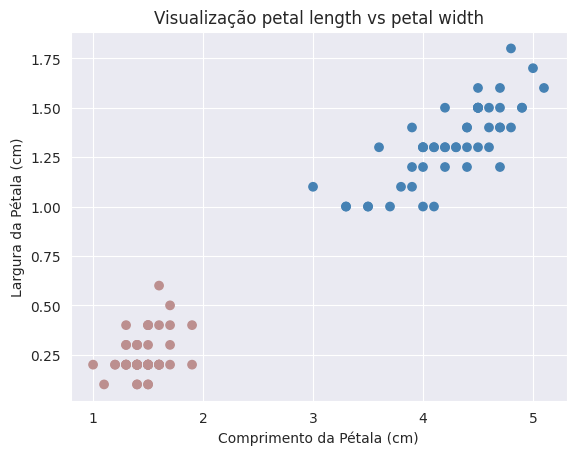

In [97]:
# Visualização:
fig, ax = plt.subplots()
sns.set_style("darkgrid")
colors = ['#BC8F8F' if label == 0 else '#4682B4' for label in y]
ax.scatter(X['petal length (cm)'], X['petal width (cm)'], c=colors)

# Configurações do Gráfico:
ax.set_title('Visualização petal length vs petal width')
ax.set_xlabel('Comprimento da Pétala (cm)')
ax.set_ylabel('Largura da Pétala (cm)')
plt.show()

    Note que de fato é visualmente notável que é linearmente
    separavél, ou seja, é possivel a utilização de SVM. Poderia
    não ser... Utilizando "truques de kernel" dá pra achar um espaço
    vetorial, ainda que não seja possivel construir imagem,
    mas que a matemática garante que há separação linear.

## Vetores Suportes:

    São os pontos que nivelam o hiperplano
    de separação dos dados. O pilar do SVM.

In [99]:
# Importando SVC:
from sklearn.svm import SVC

In [100]:
# Instanciando o modelo:
clf = SVC(kernel='linear')

# Ajustando o modelo:
clf.fit(X_train,y_train)

SVC(kernel='linear')

Nota:

    O sklearn varia o coef_ de acordo com o parâmetro kernel. Se
    o parâmetro kernel não estiver setado como "linear", ele não
    possui coef_, apenas dualcoef_.

Definido os Coeficientes:

In [114]:
# Coeficientes angular:
b1 = clf.coef_[0][0]
b2 = clf.coef_[0][1]

# Coeficientes angular:
clf.coef_

array([[1.1769056 , 0.78337144]])

In [115]:
# Intercept:
b0 = clf.intercept_[0]

clf.intercept_

array([-3.39254856])

In [112]:
# Intercept:
b0 = clf.intercept_[0];b0

-3.392548559820387

    Aqui a ideia de coeficiente é a mesma ideia da regressão
    linear.

In [153]:
# Checando os pontos definitivos para a reta suporte
clf.support_vectors_

array([[1.9, 0.2],
       [1.7, 0.5],
       [3. , 1.1]])

Construindo Visualização da separação do hiperplano de divisão:

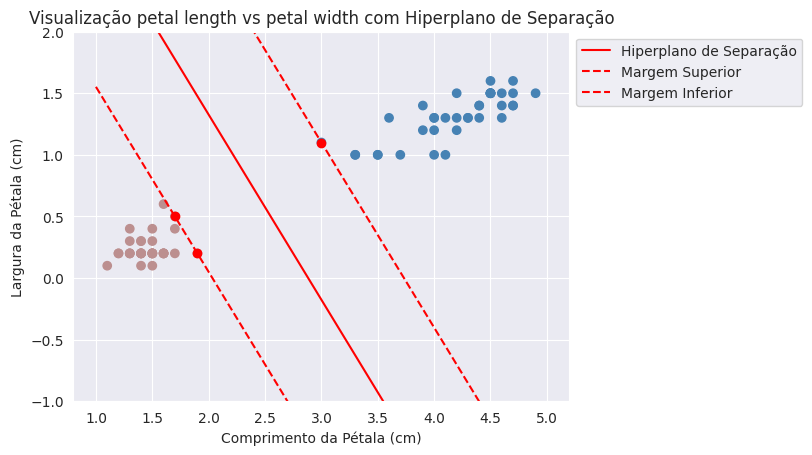

In [160]:
# Visualização:
fig, ax = plt.subplots()
sns.set_style("darkgrid")
colors_train = ['#BC8F8F' if label == 0 else '#4682B4' for label in y_train]
ax.scatter(X_train['petal length (cm)'], X_train['petal width (cm)'], c=colors_train)

# Criando a linha de separação do hiperplano
x_hiperplano = np.linspace(1, 5, 100)
y_hiperplano = (-b1 * x_hiperplano - b0)/b2
ax.plot(x_hiperplano, y_hiperplano, 'r', label='Hiperplano de Separação')

# Vetores Suportes:
ax.scatter(clf.support_vectors_[:,0],
           clf.support_vectors_[:,1], c='r')

# Margens:
msup = y_hiperplano_sup = (+1-b1 * x_hiperplano - b0)/b2
minf = y_hiperplano_inf = (-1-b1 * x_hiperplano - b0)/b2
ax.plot(x_hiperplano,msup,c='r',linestyle='dashed', label='Margem Superior')
ax.plot(x_hiperplano,minf,c='r',linestyle='dashed', label='Margem Inferior')

# Configurações do Gráfico:
ax.set_title('Visualização petal length vs petal width com Hiperplano de Separação')
ax.set_xlabel('Comprimento da Pétala (cm)')
ax.set_ylabel('Largura da Pétala (cm)')
ax.set(ylim=(-1,2))
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Predição

In [165]:
X,y = datasets.load_iris(return_X_y=True, as_frame=True);X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [166]:
X_train, X_test, y_train, y_test = tts(X,y,test_size=.3, random_state=42)

In [167]:
# Instanciando o modelo e Ajustando:
clf2 = SVC().fit(X_train,y_train)

In [169]:
# Predição:
y_pred = clf2.predict(X_test);y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [170]:
from sklearn.metrics import confusion_matrix

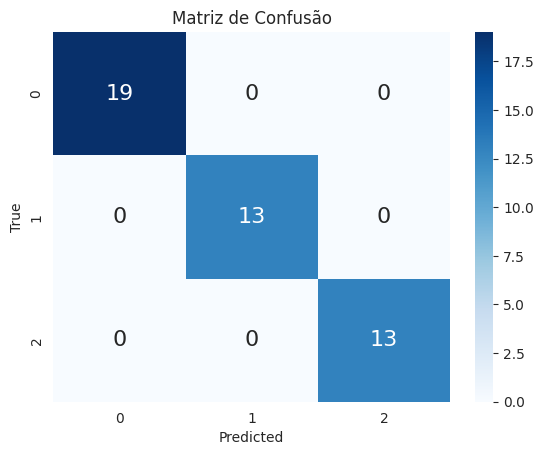

In [176]:
# Supondo que você já tenha as variáveis y_test e y_pred
cm = confusion_matrix(y_test, y_pred)

# Crie um heatmap da matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

# Adicione rótulos aos eixos
plt.xlabel('Predicted')
plt.ylabel('True')

# Adicione um título
plt.title('Matriz de Confusão')

# Exiba o gráfico
plt.show()

**Conclusão**

    O SVM é um modelo interessante para classificação multinomial,
    em situações que se precise de pouca despendio computacional.
    